In [1]:
%matplotlib inline
import os
import calendar
from pathlib import Path
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt

In [2]:
ebay = pd.read_csv('eBayNetwork.csv')

In [3]:
ebay.head()

,Seller,Bidder,Weight,Bidder.Volume,Seller.Volume
0,332874919,718577508,2,3,547
1,594667804,399983466,5,6,183
2,663070601,655828811,1,4,274
3,309608641,599835541,3,8,3986
4,201729374,693022555,1,2,4681


In [4]:
ebay.shape

(200, 5)

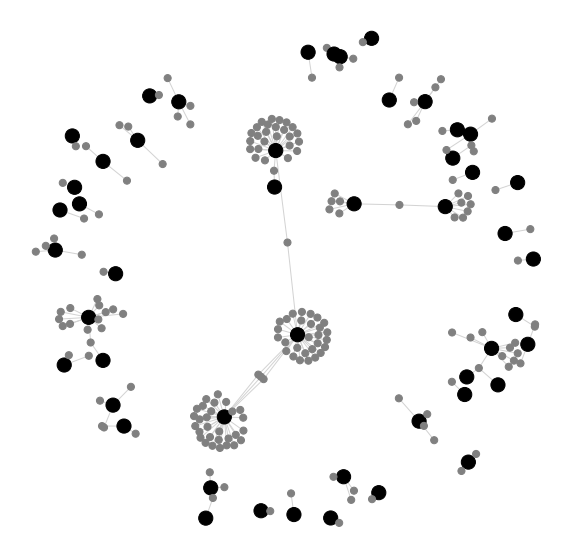

In [5]:
ebay_df = pd.read_csv('eBayNetwork.csv')

G = nx.from_pandas_edgelist(ebay_df, source='Seller', target='Bidder')

isBidder = [n in set(ebay_df.Bidder) for n in G.nodes()]
pos = nx.spring_layout(G, k=0.13, iterations=60, scale=0.5)
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 edge_color='lightgray',
                 node_color=['gray' if bidder else 'black' for bidder in isBidder],
                 node_size=[50 if bidder else 200 for bidder in isBidder])
plt.axis('off')

plt.show()